In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [72]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [73]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [74]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [75]:
df=df.rename({'v1': 'target', 'v2': 'text'},axis=1)

In [76]:
df


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [78]:
spam = df[df['target']=='spam']

In [79]:
spam

,target,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [80]:
ham = df[df['target']=='ham']

In [81]:
ham

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [82]:
print('spam percentage:',(len(spam)/len(df))*100)

spam percentage: 13.406317300789663


In [83]:
print('ham percentage:',(len(ham)/len(df))*100)

ham percentage: 86.59368269921033


In [84]:
#ham is of 86% whilw spam is of 13%

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

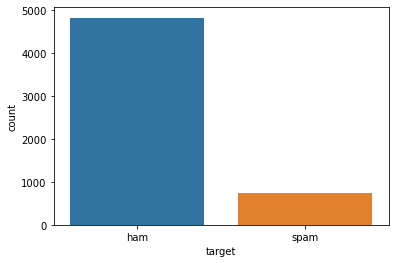

In [86]:
sns.countplot(df['target'])

In [87]:
#we can see that there are more ham than spam

In [88]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [89]:
df['target']=np.where(df['target']=='spam',1,0)

In [90]:
spam=[]
ham=[]
spam_class=df[df['target']==1]['text']
ham_class=df[df['target']==0]['text']

In [91]:
def extract_ham(ham_class):
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham=ham+words

In [92]:
def extract_spam(spam_class):
    global spam
    words = [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam=spam+words

In [93]:
spam_class.apply(extract_spam)
ham_class.apply(extract_ham )

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [94]:
from nltk.stem import SnowballStemmer
import string
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["text"] = df["text"].apply(cleanText)
df.head(n = 10) 

,target,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkts 2...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though
5,1,freemsg hey darl 3 week word back id like fun ...
6,0,even brother like speak treat like aid patent
7,0,per request mell mell oru minnaminungint nurun...
8,1,winner valu network custom select receivea å£9...
9,1,mobil 11 month u r entitl updat latest colour ...


In [95]:
y=df['target']
X=df['text']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
X_train=cv.fit_transform(X_train)

In [99]:
lr.fit(X_train,y_train)
pred_1=lr.predict(cv.transform(X_test))
score_1=accuracy_score(y_test,pred_1)
score_1

0.9808612440191388

In [100]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
pred_2=nb.predict(cv.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
score_2

0.9844497607655502

In [101]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
pred_3=svm.predict(cv.transform(X_test))
score_3=accuracy_score(y_test,pred_3)
score_3

0.9814593301435407